In [1]:
from mplsoccer.pitch import Pitch
import matplotlib.pyplot as plt
import os

# Show different pitch types

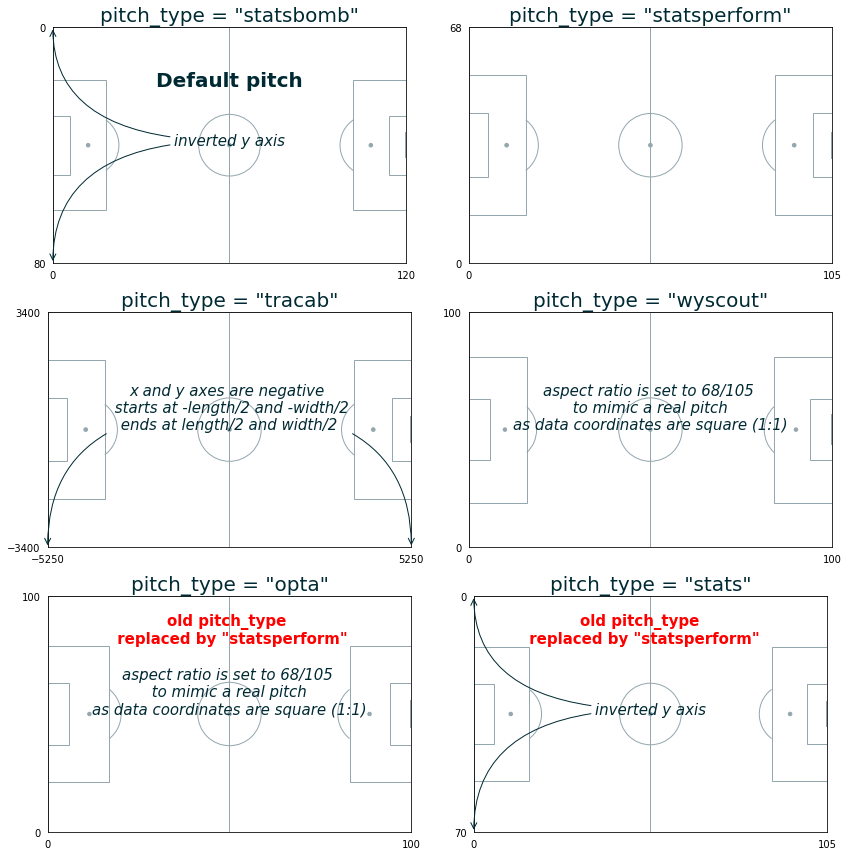

In [2]:
fig, axes = plt.subplots(3,2,figsize=(12,12))
axes = axes.ravel()
pitch_kwargs = {'pitch_color': 'None', 'line_color': '#94A7AE', 'axis':True, 'label': True, 'pad_left': 0,
                'pad_right': 0, 'pad_top': 0, 'pad_bottom': 0, 'linewidth': 1} 
pitch_types = ['statsbomb','statsperform','tracab','wyscout','opta','stats']
fontcolor = '#002a33'
arrowprops = {'arrowstyle': '->', 'connectionstyle': 'angle3,angleA=0,angleB=-90', 'color': fontcolor}
font_kwargs = {'fontsize': 15, 'ha': 'center', 'fontstyle': 'italic', 'c': fontcolor}
for idx, pt in enumerate(pitch_types):
    if pt == 'tracab':
        pitch = Pitch(pitch_type=pt, pitch_length=105, pitch_width=68, **pitch_kwargs)     
    else:
        pitch = Pitch(pitch_type=pt, **pitch_kwargs)
    pitch.draw(axes[idx])
    xmin, xmax, ymin, ymax = pitch.extent
    if pitch.aspect != 1:
        text = ('aspect ratio is set to 68/105 \n to mimic a real pitch \n'
                'as data coordinates are square (1:1)')
        axes[idx].annotate(text, xy=(xmin,ymin), xytext=(0 + (xmax - xmin)/2, ymin + (ymax - ymin)/2),
                           **font_kwargs)
    axes[idx].xaxis.set_ticks([xmin,xmax])
    axes[idx].yaxis.set_ticks([ymin,ymax])
    axes[idx].set_title(f'pitch_type = "{pt}"', fontsize=20, c=fontcolor)
    if pt == 'statsbomb':
        axes[idx].annotate('Default pitch',xy=(60,20),ha='center', fontsize=20, c=fontcolor, fontweight='bold')
    if pitch.invert_y: 
        text = 'inverted y axis'
        axes[idx].annotate(text, xy=(xmin,ymin), xytext=(0 + (xmax - xmin)/2, ymin + (ymax - ymin)/2),
                           arrowprops=arrowprops, **font_kwargs)
        axes[idx].annotate(text, xy=(xmin,ymax), xytext=(0 + (xmax - xmin)/2, ymin + (ymax - ymin)/2),
                           alpha=0, arrowprops=arrowprops, **font_kwargs)

    if xmin < 0:
        text = ('x and y axes are negative \n starts at -length/2 and -width/2'
               '\n ends at length/2 and width/2 ')
        axes[idx].annotate(text, xy = (xmin,ymin), xytext = (0,0),
                           arrowprops=arrowprops, **font_kwargs)
        axes[idx].annotate(text,xy = (xmax,ymin), xytext = (0,0),
                           alpha=0, arrowprops=arrowprops, **font_kwargs)
    if pt in ['opta','stats']:
        if pt == 'opta':
            xy = (50,80)
        else:
            xy = (50,14)
        axes[idx].annotate('old pitch_type \n replaced by "statsperform"', c='red',
                           xy = xy,
                           fontsize = 15, horizontalalignment = 'center',
                           fontweight='bold')
fig.tight_layout()
fig.savefig(os.path.join('figures','README_pitch_type.png'))